In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

from config import weather_api_key
# Import the time module.
import time


In [2]:
#generate the latitudes and longitudes using the random() 
#use np.random.uniform( low, high, size = )

#use the zip() function to conjoin them as pairs 

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


#the output is a zip object in memory 
# zip object packs each lats and longs in pairs. it will hold the iterator object 
# and produce a tuples in the form of (x,y) 


In [3]:
# #unpack lat_longs zip object into a list 
# #define the list as coordinates 
# coordinates = list(lat_longs)

In [4]:
#generate random world cities 
#use the coordinates in our lat_longs tuple to find the nearest city using 
# need to use citipy module to use it with

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

#add a decision statement with a logical operator 'not in' to determine whether 
#found city already is already in the cities list 



603

In [5]:
# # API call == navigating 
# # when clients request information from our server through our website, making an API call 
# #API points to a URL and collects some data from the webpage or server 
# #register for an API key and retrieve weather data from an API call 

# # javascript object notation (JSON) format for API data 
# # the data within a JSON format has {} around them, kinda like a dictionary and arrays 
# # Import the requests library.
# import requests

# # Import the API key.
# from config import weather_api_key
# # Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a0fcf0f736dee95cc71a02a89266da8


In [6]:
# the python requests library 
# to reqeust JSON data over the internet, use the requests library in python
# import requests
# requests.__version__

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_description = city_weather["weather"][0]["description"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Get rain information
        try:
            city_rain = city_weather["rain"]["3h"]
        except:
            city_rain = 0
        
        #Get snow information
        try:
            city_snow = city_weather["snow"]["3h"]
        except:
            city_snow = 0
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Weather": city_description,
                          "Rain inches (last 3 hrs)": city_rain,
                          "Snow inches (last 3 hrs)": city_snow,
                          "Date": city_date})
      
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | aksu
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | port hedland
Processing Record 11 of Set 1 | lamar
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | tarko-sale
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | simdega
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | weligama
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | poronaysk
Processing Record 23 of Set 1 | taolanaro
City not

Processing Record 40 of Set 4 | batemans bay
Processing Record 41 of Set 4 | fairbanks
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | ciudad bolivar
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | starosubkhangulovo
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | qaanaaq
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | alice town
Processing Record 5 of Set 5 | klyuchi
Processing Record 6 of Set 5 | aguimes
Processing Record 7 of Set 5 | amahai
Processing Record 8 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 9 of Set 5 | san policarpo
Processing Record 10 of Set 5 | mareeba
Processing Record 11 of Set 5 | longyearbyen
Processing Record 12 of Set 5 | caconde
Processing Record 1

Processing Record 31 of Set 8 | groton
Processing Record 32 of Set 8 | ahuimanu
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | trincomalee
Processing Record 35 of Set 8 | dudinka
Processing Record 36 of Set 8 | bereda
Processing Record 37 of Set 8 | laramie
Processing Record 38 of Set 8 | cururupu
Processing Record 39 of Set 8 | ojinaga
Processing Record 40 of Set 8 | kitangari
Processing Record 41 of Set 8 | aripuana
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 44 of Set 8 | itarema
Processing Record 45 of Set 8 | madingou
Processing Record 46 of Set 8 | haibowan
City not found. Skipping...
Processing Record 47 of Set 8 | enugu
Processing Record 48 of Set 8 | nouadhibou
Processing Record 49 of Set 8 | svetlogorsk
Processing Record 50 of Set 8 | amderma
City not found. Skipping...
Processing Record 1 of Set 9 | porec
Processing Record 2 of Set 9 | zitlaltepec
Processing Reco

Processing Record 16 of Set 12 | buala
Processing Record 17 of Set 12 | lagos
Processing Record 18 of Set 12 | paamiut
Processing Record 19 of Set 12 | vestmanna
Processing Record 20 of Set 12 | puerto madero
Processing Record 21 of Set 12 | belur
Processing Record 22 of Set 12 | auki
Processing Record 23 of Set 12 | skibbereen
Processing Record 24 of Set 12 | mokhsogollokh
Processing Record 25 of Set 12 | traralgon
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | nantai
Processing Record 28 of Set 12 | susanville
Processing Record 29 of Set 12 | zhovti vody
Processing Record 30 of Set 12 | ambon
Processing Record 31 of Set 12 | mitchell
Processing Record 32 of Set 12 | alekseyevka
Processing Record 33 of Set 12 | vanderhoof
Processing Record 34 of Set 12 | tual
Processing Record 35 of Set 12 | lesosibirsk
Processing Record 36 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 37 of Set 12 | danilov
Processing Record 38 of Set 12 | puerto asis
Pr

In [8]:
#create a df of city weather data 
# convert array of dictionaries to a df, exporting df to csv file 
# df = pd.DataFrame(list with dictionaries) # convert a list of dictionaries to a df 

#convert the array of dictionaries to a panda df 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Weather,Rain inches (last 3 hrs),Snow inches (last 3 hrs),Date
0,Ushuaia,-54.8000,-68.3000,29.86,86,75,27.63,AR,light snow,0.0,0,2021-09-15 20:59:50
1,Bluff,-46.6000,168.3333,43.81,71,88,11.59,NZ,overcast clouds,0.0,0,2021-09-15 21:03:50
2,Khatanga,71.9667,102.5000,40.24,94,100,9.66,RU,overcast clouds,0.0,0,2021-09-15 21:03:51
3,Port Alfred,-33.5906,26.8910,57.56,74,42,10.27,ZA,scattered clouds,0.0,0,2021-09-15 21:03:51
4,Rikitea,-23.1203,-134.9692,73.67,66,0,15.84,PF,clear sky,0.0,0,2021-09-15 21:03:51


In [10]:
#plot lat and temp 
# to create a plot use plt.scatter() 
# retrieve data from the df for plotting. filter by var = df[""]
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [20]:
# in the dependencies cell, we imported the time module 
# get today's date in seconds 
# get today's time in seconds since jan 1, 1970
today = time.time()

# convert the datetime stamp using the strftime() and passing the format parameters 
today = time.strftime("%x") 
today

AttributeError: 'str' object has no attribute 'time'

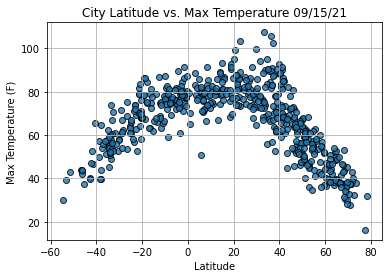

In [25]:
#create a scatter plot 
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

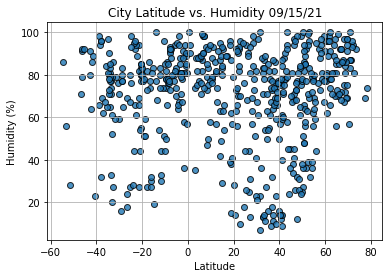

In [26]:
#plot lat vs humidity 
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

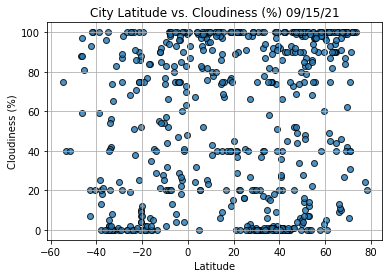

In [27]:
#plot lat vs cloudiness 
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

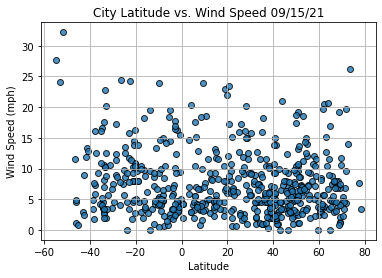

In [28]:
#plot lat vs wind speed 
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
#use linear regression to find the relationship bt variables 
#determine the correlations between weather data and latitude 
# add a regression line equation and correlation coefficient to each scatter plot 

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

